In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Harold Data\Projects\2023-10-23_BF_DS\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('test_data.csv', sep=',')
data.head()

,id,created_at,updated_at,deleted_at,user_id,producto_id,pedido_id,tienda_id,faltante_id,nombre,unidad,precio,cantidad,cantidad_enviada,fecha_despacho,cantidad_anulada,cantidad_faltante,costo_actual
0,1,2022-07-07 06:27:17,2022-07-07 06:28:09,2022-07-07 06:28:09,24570,10,0,1,NaN,Cebolla morada,1 kg,1390,1.0,1.0,2022-07-08,NaN,0.0,NaN
1,2139665,2021-03-10 10:01:19,2021-03-10 16:15:17,2022-03-06 21:39:24,24252,1164,68834,1,NaN,Berros 100g,100 g,780,1.0,1.0,2024-02-01,NaN,0.0,NaN
2,3126362,2022-02-11 12:41:06,2022-02-11 12:56:37,NaN,31695,53,101286,1,NaN,Ciruelas,1 k,1590,2.5,2.5,2022-02-21,NaN,0.0,NaN
3,3126363,2022-02-11 12:41:06,2022-02-11 12:56:37,NaN,31695,232,101286,1,NaN,Durazno Nectarín,1 k,1990,3.0,3.0,2022-02-21,NaN,0.0,NaN
4,3126364,2022-02-11 12:41:06,2022-02-21 12:05:45,NaN,31695,233,101286,1,12310.0,Durazno Peludo,1 k,1990,3.0,3.0,2022-02-21,NaN,3.0,NaN


In [4]:
data.describe()

,id,user_id,producto_id,pedido_id,tienda_id,faltante_id,precio,cantidad,cantidad_enviada,cantidad_anulada,cantidad_faltante,costo_actual
count,1.437775e+06,1.437775e+06,1.437775e+06,1.437775e+06,1.437775e+06,21835.000000,1.437775e+06,1.437774e+06,1.437741e+06,599268.0,1.437775e+06,6.878950e+05
mean,4.177508e+06,3.433009e+04,4.911371e+02,1.421620e+05,1.146362e+00,23505.564278,1.880482e+03,1.789331e+00,1.771382e+00,0.0,3.791818e-02,1.179148e+03
std,5.822999e+05,1.576814e+04,6.274503e+02,2.369782e+04,6.236407e-01,6499.314422,1.629195e+03,1.585864e+01,1.653072e+01,0.0,1.084075e+00,1.816009e+04
min,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,12285.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,-4.990000e+02,-2.232100e+04
25%,3.676652e+06,2.176200e+04,3.800000e+01,1.216410e+05,1.000000e+00,17919.500000,9.900000e+02,1.000000e+00,1.000000e+00,0.0,0.000000e+00,5.040000e+02
50%,4.190343e+06,3.825900e+04,1.270000e+02,1.414430e+05,1.000000e+00,23482.000000,1.490000e+03,1.000000e+00,1.000000e+00,0.0,0.000000e+00,8.090000e+02
75%,4.679810e+06,4.511200e+04,8.970000e+02,1.630170e+05,1.000000e+00,29073.500000,2.190000e+03,2.000000e+00,2.000000e+00,0.0,0.000000e+00,1.297000e+03
max,5.177992e+06,6.095300e+04,2.505000e+03,1.830970e+05,5.000000e+00,34808.000000,5.799000e+04,1.850000e+04,1.850000e+04,0.0,5.000000e+02,1.027984e+07


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437775 entries, 0 to 1437774
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1437775 non-null  int64  
 1   created_at         1437775 non-null  object 
 2   updated_at         1437775 non-null  object 
 3   deleted_at         195195 non-null   object 
 4   user_id            1437775 non-null  int64  
 5   producto_id        1437775 non-null  int64  
 6   pedido_id          1437775 non-null  int64  
 7   tienda_id          1437775 non-null  int64  
 8   faltante_id        21835 non-null    float64
 9   nombre             1437775 non-null  object 
 10  unidad             1437775 non-null  object 
 11  precio             1437775 non-null  int64  
 12  cantidad           1437774 non-null  float64
 13  cantidad_enviada   1437741 non-null  float64
 14  fecha_despacho     1437775 non-null  object 
 15  cantidad_anulada   599268 non-nu

In [6]:
# Definir los cuartiles de precios
cuartiles = pd.qcut(data['precio'], q=[0, 0.25, 0.5, 0.75, 1.0], labels=['q1', 'q2', 'q3', 'q4'])

# Agregar las etiquetas al DataFrame
data['cuartiles_precio'] = cuartiles

In [7]:
data.head()

,id,created_at,updated_at,deleted_at,user_id,producto_id,pedido_id,tienda_id,faltante_id,nombre,unidad,precio,cantidad,cantidad_enviada,fecha_despacho,cantidad_anulada,cantidad_faltante,costo_actual,cuartiles_precio
0,1,2022-07-07 06:27:17,2022-07-07 06:28:09,2022-07-07 06:28:09,24570,10,0,1,NaN,Cebolla morada,1 kg,1390,1.0,1.0,2022-07-08,NaN,0.0,NaN,q2
1,2139665,2021-03-10 10:01:19,2021-03-10 16:15:17,2022-03-06 21:39:24,24252,1164,68834,1,NaN,Berros 100g,100 g,780,1.0,1.0,2024-02-01,NaN,0.0,NaN,q1
2,3126362,2022-02-11 12:41:06,2022-02-11 12:56:37,NaN,31695,53,101286,1,NaN,Ciruelas,1 k,1590,2.5,2.5,2022-02-21,NaN,0.0,NaN,q3
3,3126363,2022-02-11 12:41:06,2022-02-11 12:56:37,NaN,31695,232,101286,1,NaN,Durazno Nectarín,1 k,1990,3.0,3.0,2022-02-21,NaN,0.0,NaN,q3
4,3126364,2022-02-11 12:41:06,2022-02-21 12:05:45,NaN,31695,233,101286,1,12310.0,Durazno Peludo,1 k,1990,3.0,3.0,2022-02-21,NaN,3.0,NaN,q3


In [8]:
data['fecha_despacho'] = pd.to_datetime(data['fecha_despacho'])

Cantidad de elementos de cada cuartil vendidos cada mes.

In [9]:
# Agrupar por mes y cuartil, y contar la cantidad de elementos en cada grupo
resultados = data.groupby([data['fecha_despacho'].dt.to_period("M"), 'cuartiles_precio']).size().unstack(fill_value=0)


C:\Users\BERSERKER\AppData\Local\Temp\ipykernel_13684\2724734899.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultados = data.groupby([data['fecha_despacho'].dt.to_period("M"), 'cuartiles_precio']).size().unstack(fill_value=0)


In [10]:
resultados

cuartiles_precio,q1,q2,q3,q4
fecha_despacho,,,,
2022-02,6473,5813,5438,5010
2022-03,22313,18350,22556,16608
2022-04,20960,17695,19534,13753
2022-05,25058,18256,21785,14812
2022-06,26707,16025,22788,14020
2022-07,24490,15003,21980,13157
2022-08,23377,18597,22115,15505
2022-09,24233,13960,20992,15561
2022-10,28934,14420,25064,18850


In [11]:
# Eliminando filas
resultados.drop(resultados.index[-1], inplace=True)
resultados

cuartiles_precio,q1,q2,q3,q4
fecha_despacho,,,,
2022-02,6473,5813,5438,5010
2022-03,22313,18350,22556,16608
2022-04,20960,17695,19534,13753
2022-05,25058,18256,21785,14812
2022-06,26707,16025,22788,14020
2022-07,24490,15003,21980,13157
2022-08,23377,18597,22115,15505
2022-09,24233,13960,20992,15561
2022-10,28934,14420,25064,18850


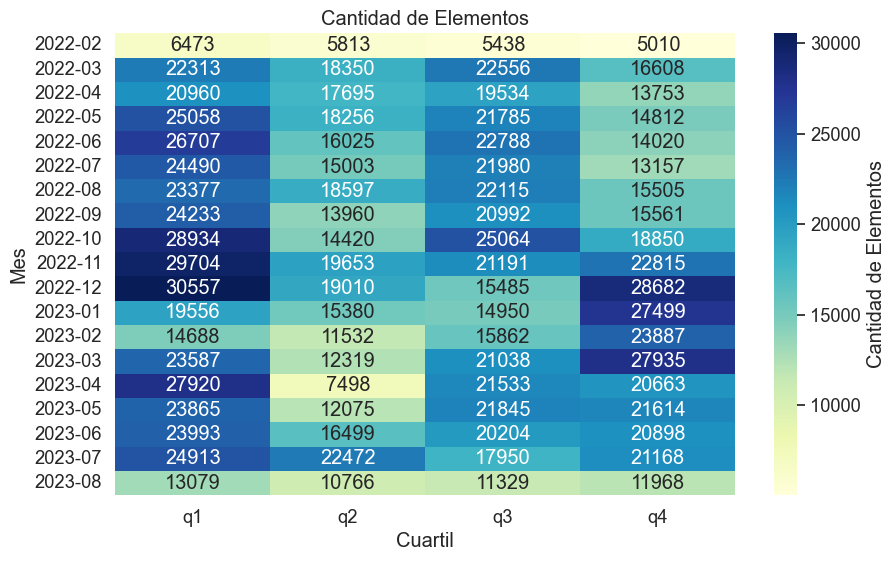

In [12]:
# Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(resultados, annot=True, cmap="YlGnBu", fmt='g', cbar_kws={'label': 'Cantidad de Elementos'})

# Añadir etiquetas y título
plt.title('Cantidad de Elementos')
plt.xlabel('Cuartil')
plt.ylabel('Mes')

# Mostrar el heatmap
plt.show()

Ganancias por cuartiles

In [13]:
data['ganancia'] = data['cantidad'] * data['precio']
data.head()

,id,created_at,updated_at,deleted_at,user_id,producto_id,pedido_id,tienda_id,faltante_id,nombre,unidad,precio,cantidad,cantidad_enviada,fecha_despacho,cantidad_anulada,cantidad_faltante,costo_actual,cuartiles_precio,ganancia
0,1,2022-07-07 06:27:17,2022-07-07 06:28:09,2022-07-07 06:28:09,24570,10,0,1,NaN,Cebolla morada,1 kg,1390,1.0,1.0,2022-07-08,NaN,0.0,NaN,q2,1390.0
1,2139665,2021-03-10 10:01:19,2021-03-10 16:15:17,2022-03-06 21:39:24,24252,1164,68834,1,NaN,Berros 100g,100 g,780,1.0,1.0,2024-02-01,NaN,0.0,NaN,q1,780.0
2,3126362,2022-02-11 12:41:06,2022-02-11 12:56:37,NaN,31695,53,101286,1,NaN,Ciruelas,1 k,1590,2.5,2.5,2022-02-21,NaN,0.0,NaN,q3,3975.0
3,3126363,2022-02-11 12:41:06,2022-02-11 12:56:37,NaN,31695,232,101286,1,NaN,Durazno Nectarín,1 k,1990,3.0,3.0,2022-02-21,NaN,0.0,NaN,q3,5970.0
4,3126364,2022-02-11 12:41:06,2022-02-21 12:05:45,NaN,31695,233,101286,1,12310.0,Durazno Peludo,1 k,1990,3.0,3.0,2022-02-21,NaN,3.0,NaN,q3,5970.0


In [14]:
# Agrupar por mes y cuartil, y sumar las ganancias
ganancias = data.groupby([data['fecha_despacho'].dt.to_period("M"), 'cuartiles_precio'])['ganancia'].sum().unstack(fill_value=0)
ganancias


C:\Users\BERSERKER\AppData\Local\Temp\ipykernel_13684\4136150470.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ganancias = data.groupby([data['fecha_despacho'].dt.to_period("M"), 'cuartiles_precio'])['ganancia'].sum().unstack(fill_value=0)


cuartiles_precio,q1,q2,q3,q4
fecha_despacho,,,,
2022-02,8.718462e+06,1.310022e+07,1.683548e+07,3.086673e+07
2022-03,3.091422e+07,3.647128e+07,6.773437e+07,9.958436e+07
2022-04,2.952904e+07,3.762588e+07,6.035720e+07,9.159399e+07
2022-05,3.434990e+07,3.840508e+07,6.583726e+07,9.387167e+07
2022-06,3.595252e+07,3.391912e+07,6.540248e+07,8.775537e+07
2022-07,3.644933e+07,3.294546e+07,6.638100e+07,8.306661e+07
2022-08,3.831119e+07,4.039570e+07,6.493068e+07,9.698290e+07
2022-09,4.115503e+07,3.019385e+07,6.469579e+07,9.446758e+07
2022-10,4.621352e+07,2.762238e+07,7.599556e+07,9.795491e+07


In [15]:
# Eliminando filas
ganancias.drop(ganancias.index[-1], inplace=True)
ganancias.drop(ganancias.index[0], inplace=True)
ganancias

cuartiles_precio,q1,q2,q3,q4
fecha_despacho,,,,
2022-03,3.091422e+07,3.647128e+07,6.773437e+07,9.958436e+07
2022-04,2.952904e+07,3.762588e+07,6.035720e+07,9.159399e+07
2022-05,3.434990e+07,3.840508e+07,6.583726e+07,9.387167e+07
2022-06,3.595252e+07,3.391912e+07,6.540248e+07,8.775537e+07
2022-07,3.644933e+07,3.294546e+07,6.638100e+07,8.306661e+07
2022-08,3.831119e+07,4.039570e+07,6.493068e+07,9.698290e+07
2022-09,4.115503e+07,3.019385e+07,6.469579e+07,9.446758e+07
2022-10,4.621352e+07,2.762238e+07,7.599556e+07,9.795491e+07
2022-11,4.605649e+07,3.705513e+07,6.752219e+07,1.154194e+08


In [16]:
# Formatear valores 
ganancias = ganancias.applymap(lambda x: x/1e+06)

C:\Users\BERSERKER\AppData\Local\Temp\ipykernel_13684\1797199929.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ganancias = ganancias.applymap(lambda x: x/1e+06)


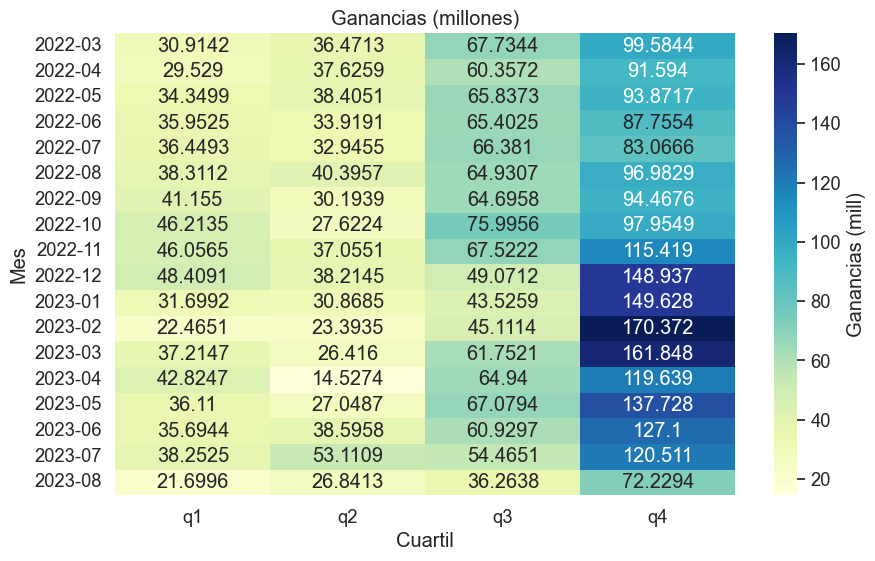

In [17]:
# Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Crear el heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(ganancias, annot=True, cmap="YlGnBu", fmt='g', cbar_kws={'label': 'Ganancias (mill)'})

# Añadir etiquetas y título
plt.title('Ganancias (millones)')
plt.xlabel('Cuartil')
plt.ylabel('Mes')

# Mostrar el heatmap
plt.show()

In [18]:
data.head()

,id,created_at,updated_at,deleted_at,user_id,producto_id,pedido_id,tienda_id,faltante_id,nombre,unidad,precio,cantidad,cantidad_enviada,fecha_despacho,cantidad_anulada,cantidad_faltante,costo_actual,cuartiles_precio,ganancia
0,1,2022-07-07 06:27:17,2022-07-07 06:28:09,2022-07-07 06:28:09,24570,10,0,1,NaN,Cebolla morada,1 kg,1390,1.0,1.0,2022-07-08,NaN,0.0,NaN,q2,1390.0
1,2139665,2021-03-10 10:01:19,2021-03-10 16:15:17,2022-03-06 21:39:24,24252,1164,68834,1,NaN,Berros 100g,100 g,780,1.0,1.0,2024-02-01,NaN,0.0,NaN,q1,780.0
2,3126362,2022-02-11 12:41:06,2022-02-11 12:56:37,NaN,31695,53,101286,1,NaN,Ciruelas,1 k,1590,2.5,2.5,2022-02-21,NaN,0.0,NaN,q3,3975.0
3,3126363,2022-02-11 12:41:06,2022-02-11 12:56:37,NaN,31695,232,101286,1,NaN,Durazno Nectarín,1 k,1990,3.0,3.0,2022-02-21,NaN,0.0,NaN,q3,5970.0
4,3126364,2022-02-11 12:41:06,2022-02-21 12:05:45,NaN,31695,233,101286,1,12310.0,Durazno Peludo,1 k,1990,3.0,3.0,2022-02-21,NaN,3.0,NaN,q3,5970.0


¿Cuál es el producto más y menos vendido? (Cantidad)

In [19]:
cantidad_vendidos = data.groupby('nombre').size().sort_values(ascending=False)
print(cantidad_vendidos.head(10))
print(cantidad_vendidos.tail(10))

nombre
Zanahoria          38117
Limón              36284
Tomate             31284
Plátano Maduro     29968
Papas              29629
Brócoli            28112
Cebolla            26843
Champiñón          25053
Pepino Ensalada    24263
Frutillas          24175
dtype: int64
nombre
Canasta Hogar             1
Piñas en rodajas          1
Poroto Verde              1
Caja zapallo italiano     1
Caja pimiento verde       1
Polvos de hornear         1
Caja pimiento amarillo    1
Caja pepino ensalada      1
Caja maracuyá             1
Canasta Sin Gluten        1
dtype: int64


¿Cuál es el producto que más y menos ganancias genera?

In [20]:
ganancias_vendidos = data.groupby('nombre')['ganancia'].sum().sort_values(ascending=False)
print(ganancias_vendidos.head(10))
print(ganancias_vendidos.tail(10))

nombre
Palta Hass Chilena    1.874854e+08
Plátano Maduro        1.599156e+08
Tomate                1.275638e+08
Frutillas             1.191329e+08
Limón                 9.321850e+07
Champiñón             7.767806e+07
Papas                 7.177491e+07
Naranja               5.932270e+07
Brócoli               5.771356e+07
Palta Hass Peruana    5.577138e+07
Name: ganancia, dtype: float64
nombre
Basurero 10 Lts                                 1.0
Fechadora                                       1.0
Sopapo                                          1.0
Etiquetas Autoadhesivas                         1.0
Etiquetas Adhesivas Zebra                       1.0
Galletas Granjeritas Chocolate - Smiley Kids    0.0
Habas Congeladas                                0.0
Barra de Avellanas 55% Cacao                    0.0
Poroto Verde                                    0.0
Mix Porotos Granados                            0.0
Name: ganancia, dtype: float64


¿Cuáles son las ganancias mensuales?

In [21]:
data_ganan_mes = data.groupby(data['fecha_despacho'].dt.to_period("M"))['ganancia'].sum()
data_ganan_mes.drop(data_ganan_mes.index[-1], inplace=True)
data_ganan_mes.drop(data_ganan_mes.index[-1], inplace=True)
data_ganan_mes.drop(data_ganan_mes.index[0], inplace=True)
data_ganan_mes = pd.DataFrame(data_ganan_mes).reset_index()
data_ganan_mes

,fecha_despacho,ganancia
0,2022-03,2.347042e+08
1,2022-04,2.191061e+08
2,2022-05,2.324639e+08
3,2022-06,2.230295e+08
4,2022-07,2.188424e+08
5,2022-08,2.406205e+08
6,2022-09,2.305123e+08
7,2022-10,2.477864e+08
8,2022-11,2.660532e+08
9,2022-12,2.846316e+08


In [29]:
# Seaborn necesita que el eje 'x' sea timestamp, no en formato de período (PeriodDtype)
data_ganan_mes['fecha_despacho'] = data_ganan_mes['fecha_despacho'].dt.to_timestamp()

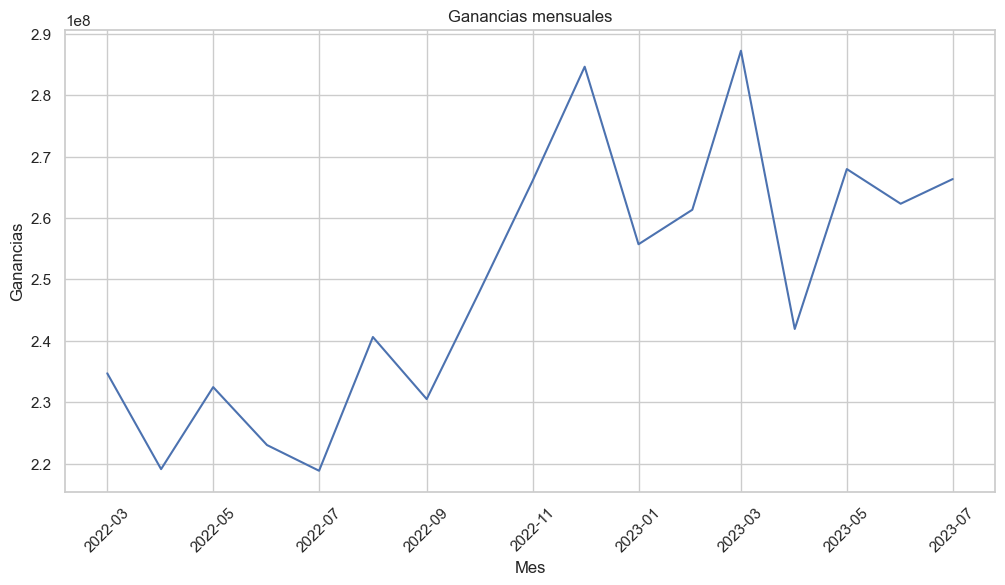

In [30]:
# Crear el lineplot
sns.set(style="whitegrid")  # Puedes ajustar el estilo según tus preferencias
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según tus necesidades
lineplot = sns.lineplot(x='fecha_despacho', y='ganancia', data=data_ganan_mes)

# Añadir etiquetas y título
plt.title('Ganancias mensuales')
plt.xlabel('Mes')
plt.ylabel('Ganancias')

# Rotar las etiquetas del eje x para mayor legibilidad (opcional)
plt.xticks(rotation=45)

# Mostrar el lineplot
plt.show()

¿Qué productos se vendieron por primera vez el 2022-10?

In [36]:
# agrupar por producto
# que muestre la fecha minima de cada uno (primera aparición)
# filtrar las que son 2022-10

data_nombres = data.groupby('nombre')['fecha_despacho'].min()
data_nombres = pd.DataFrame(data_nombres)
data_nombres_oct = data_nombres[data_nombres['fecha_despacho'] <= '2022-11-01']
data_nombres_oct = data_nombres_oct[data_nombres_oct['fecha_despacho'] >= '2022-09-30']
data_nombres_oct

,fecha_despacho
nombre,
Almendras Cubierta Chocolate Bitter,2022-10-25
Barra Berry Crudivegana Pack 4 un,2022-10-28
Barra Proteína Vegana Chocolate Naranja 5 un.,2022-10-18
Barra Proteína Vegana Mokka 5 un.,2022-10-18
Barras Blueberry Crudivegana Pack 4 un,2022-10-22
...,...
Set Pinchos Choclos,2022-10-27
Set Rallador de Verduras,2022-10-30
Tijera Multifuncional Verduras - Hierbas,2022-10-26


¿Merge de tablas?

In [3]:
# Solo filas coincidentes
# Ejemplo de dos DataFrames
df1 = pd.DataFrame({
    'columna_compartida': [1, 2, 3],
    'dato_df1': ['A', 'B', 'C']
})

df2 = pd.DataFrame({
    'columna_compartida': [2, 3, 4],
    'dato_df2': ['X', 'Y', 'Z']
})

# Combinar los DataFrames utilizando merge
df_combinado = pd.merge(df1, df2, on='columna_compartida', how='inner')

# Mostrar el DataFrame combinado
print(df_combinado)

   columna_compartida dato_df1 dato_df2
0                   2        B        X
1                   3        C        Y


In [4]:
# Todas las filas
# Ejemplo de dos DataFrames
df1 = pd.DataFrame({
    'columna_compartida': [1, 2, 3],
    'dato_df1': ['A', 'B', 'C']
})

df2 = pd.DataFrame({
    'columna_compartida': [2, 3, 4],
    'dato_df2': ['X', 'Y', 'Z']
})

# Combinar los DataFrames utilizando merge con how='outer'
df_combinado = pd.merge(df1, df2, on='columna_compartida', how='outer')

# Mostrar el DataFrame combinado
print(df_combinado)

   columna_compartida dato_df1 dato_df2
0                   1        A      NaN
1                   2        B        X
2                   3        C        Y
3                   4      NaN        Z
